In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [119]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

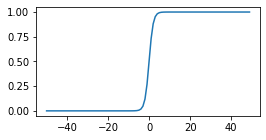

In [120]:
x = np.arange(-50, 50)
plt.figure(figsize=(4,2))
plt.plot(x, sigmoid(x))
plt.show()

In [121]:
df = pd.read_excel(r"E:\PythonCore\datafiles\Social_Network_Ads.xlsx")

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Age        284 non-null    int64
 1   Salary     284 non-null    int64
 2   Purchased  284 non-null    int64
dtypes: int64(3)
memory usage: 6.8 KB


In [123]:
df.head()

,Age,Salary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,47,25000,1
4,27,57000,0


In [124]:
# Preprocessing - Standardise data

In [125]:
from sklearn.preprocessing import StandardScaler

In [126]:
X = df.iloc[:,[0,1]].values
y = df.iloc[:,-1].values
print(X.shape, y.shape)

(284, 2) (284,)


In [127]:
s = StandardScaler()
# The standard score of a sample `x` is calculated as:
# z = (x - u) / s

In [128]:
X_sc = s.fit_transform(X)

In [129]:
# View 1st 2 rows
X_sc[0:2,:]

array([[-2.13648148, -1.50856282],
       [-0.56456246, -1.48090064]])

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
from sklearn.linear_model import LogisticRegression

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X_sc,y,test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(227, 2) (57, 2) (227,) (57,)


In [133]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)
yhat = model.predict(X_test)

In [134]:
yhat

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [135]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [136]:
accuracy_score(y_test, yhat)

0.7719298245614035

In [20]:
confusion_matrix(y_test, yhat)

array([[24,  1],
       [16, 16]], dtype=int64)

In [21]:
(24+16)/57

0.7017543859649122

In [22]:
print(24/25, 24/40)

0.96 0.6


In [23]:
print(16/32, 16/17)

0.5 0.9411764705882353


In [24]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.60      0.96      0.74        25
           1       0.94      0.50      0.65        32

    accuracy                           0.70        57
   macro avg       0.77      0.73      0.70        57
weighted avg       0.79      0.70      0.69        57



In [25]:
yhat

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [26]:
yprob = model.predict_proba(X_test)
yprob

array([[0.39230591, 0.60769409],
       [0.97409904, 0.02590096],
       [0.75700553, 0.24299447],
       [0.99165202, 0.00834798],
       [0.68675606, 0.31324394],
       [0.44498594, 0.55501406],
       [0.72341147, 0.27658853],
       [0.56181702, 0.43818298],
       [0.60260183, 0.39739817],
       [0.68301295, 0.31698705],
       [0.97413852, 0.02586148],
       [0.05634836, 0.94365164],
       [0.45512113, 0.54487887],
       [0.99351016, 0.00648984],
       [0.14864232, 0.85135768],
       [0.70770063, 0.29229937],
       [0.97608712, 0.02391288],
       [0.88026865, 0.11973135],
       [0.68113243, 0.31886757],
       [0.63620347, 0.36379653],
       [0.0371888 , 0.9628112 ],
       [0.77451997, 0.22548003],
       [0.55034091, 0.44965909],
       [0.7312222 , 0.2687778 ],
       [0.66922034, 0.33077966],
       [0.71078044, 0.28921956],
       [0.28581606, 0.71418394],
       [0.65191246, 0.34808754],
       [0.01492472, 0.98507528],
       [0.02620061, 0.97379939],
       [0.

In [27]:
#Write Python code to get answers like yhat
# Use yprob as input

In [28]:
z = np.array([1 if i[1] > 0.5 else 0 for i in yprob])

In [29]:
z

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [30]:
z-yhat # just to cross check

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [31]:
#change the threshold

In [32]:
z = np.array([1 if i[1] > 0.2 else 0 for i in yprob])

In [33]:
confusion_matrix(y_test, z)

array([[12, 13],
       [ 1, 31]], dtype=int64)

In [34]:
print(classification_report(y_test, z))

              precision    recall  f1-score   support

           0       0.92      0.48      0.63        25
           1       0.70      0.97      0.82        32

    accuracy                           0.75        57
   macro avg       0.81      0.72      0.72        57
weighted avg       0.80      0.75      0.73        57



In [35]:
# predict for Age = 42, Salary = 125000
# Age = 25, Salary = 60000

In [36]:
#Use model to predict if these people will purchase or not purchase
temp = np.array([[42, 125000], [25,60000]])
temp.shape

(2, 2)

In [37]:
temp

array([[    42, 125000],
       [    25,  60000]])

In [38]:
model.predict(temp) #wrong input to the model

array([1, 1], dtype=int64)

In [39]:
model.predict(s.transform(temp)) # Correct input is to transform data

array([1, 0], dtype=int64)

In [40]:
import seaborn as sns

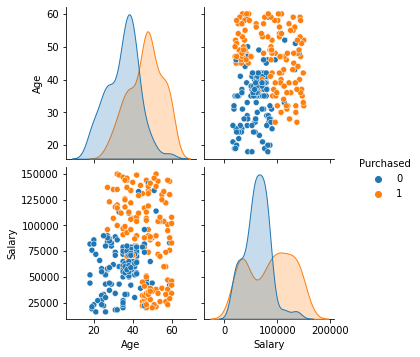

In [41]:
sns.pairplot(df, hue='Purchased');

In [42]:
a = np.array([2,3,4])
b = np.array([10,20,30])

np.c_[a,b] # column concatenate or array concatenate

array([[ 2, 10],
       [ 3, 20],
       [ 4, 30]])

In [43]:
# Creation of the mesh
age = np.arange(X_test[:,0].min()-0.2, X_test[:,0].max()+0.2,0.01)
sal = np.arange(X_test[:,1].min()-0.2, X_test[:,1].max()+0.2,0.01)

Age, Sal = np.meshgrid(age,sal)
Age.shape, Sal.shape

((397, 443), (397, 443))

In [44]:
# Convert2D to 1D and concatenate the 2 arrays
formed_data = np.c_[Age.ravel(), Sal.ravel()]
formed_data.shape

(175871, 2)

In [45]:
ans = model.predict(formed_data)
ans.shape

(175871,)

In [46]:
ans = ans.reshape(Age.shape)
ans.shape

(397, 443)

In [56]:
mask_for_NP = y_test == 0
mask_for_P = y_test == 1

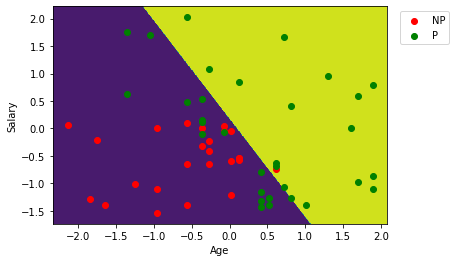

In [58]:
plt.contourf(Age, Sal, ans)
plt.scatter(X_test[mask_for_NP,0],X_test[mask_for_NP,1], c='r', label="NP")
plt.scatter(X_test[mask_for_P,0],X_test[mask_for_P,1], c='g', label="P")
# purchased and not purchased points to be colored separately
plt.xlabel("Age")
plt.ylabel("Salary")
plt.legend(bbox_to_anchor=(1.2,1))
plt.show()